In [1]:
#import dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)

Variables/Columns
TIME: Time from pour (seconds)  4-8
FOAM: Wet foam height (cm)  10-16
BEER: Beer height (cm)    18-24

**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?


In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('merged.csv')
df

,suicide_country,suicide_year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),...,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),GINI index (World Bank estimate).1,average 2000-15
0,Albania,2007,male,75+ years,8,42366,18.88,Albania2007,NaN,1.070101e+10,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
1,Albania,2007,male,35-54 years,29,378626,7.66,Albania2007,NaN,1.070101e+10,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
2,Albania,2007,male,55-74 years,14,224160,6.25,Albania2007,NaN,1.070101e+10,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
3,Albania,2007,female,75+ years,3,57404,5.23,Albania2007,NaN,1.070101e+10,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
4,Albania,2007,male,25-34 years,9,172494,5.22,Albania2007,NaN,1.070101e+10,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
5,Albania,2007,female,15-24 years,13,281080,4.63,Albania2007,NaN,1.070101e+10,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
6,Albania,2007,male,15-24 years,13,288349,4.51,Albania2007,NaN,1.070101e+10,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
7,Albania,2007,female,25-34 years,8,183629,4.36,Albania2007,NaN,1.070101e+10,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
8,Albania,2007,female,55-74 years,9,221120,4.07,Albania2007,NaN,1.070101e+10,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
9,Albania,2007,female,35-54 years,14,391811,3.57,Albania2007,NaN,1.070101e+10,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN


In [4]:
#get column names
df.columns

Index(['suicide_country', 'suicide_year', 'sex', 'age', 'suicides_no',
       'population', 'suicides/100k pop', 'country-year', 'HDI for year',
       'gdp_for_year ($)', 'gdp_per_capita ($)', 'Generation',
       'WHR2018Chapter2OnlineData_country', 'WHR2018Chapter2OnlineData_year',
       'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate).1', 'average 2000-15'],
      dtype='object')

In [5]:
#drop columns with no data - for some reason I'm getting an error now that things are cleaned out. 
df.drop(columns=['country-year', 'HDI for year', 'GINI index (World Bank estimate)', 'average 2000-15'], inplace=True)

In [6]:
#drop all NaNs
clean_df = df.dropna()
clean_df.head()

,suicide_country,suicide_year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),Generation,...,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate).1
0,Albania,2007,male,75+ years,8,42366,18.88,1.070101e+10,3863,Silent,...,-0.016183,0.8747,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,0.30325
1,Albania,2007,male,35-54 years,29,378626,7.66,1.070101e+10,3863,Boomers,...,-0.016183,0.8747,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,0.30325
2,Albania,2007,male,55-74 years,14,224160,6.25,1.070101e+10,3863,Silent,...,-0.016183,0.8747,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,0.30325
3,Albania,2007,female,75+ years,3,57404,5.23,1.070101e+10,3863,Silent,...,-0.016183,0.8747,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,0.30325
4,Albania,2007,male,25-34 years,9,172494,5.22,1.070101e+10,3863,Generation X,...,-0.016183,0.8747,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,0.30325


In [7]:
#new df with all the NaNs removed - but it looks like we may have lost some countries? 
clean_df.describe()

,suicide_year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),WHR2018Chapter2OnlineData_year,Life Ladder,Log GDP per capita,Social support,...,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate).1
count,5936.000000,5936.000000,5.936000e+03,5936.000000,5.936000e+03,5936.000000,5936.000000,5936.000000,5936.000000,5936.000000,...,5936.000000,5936.000000,5936.000000,5936.000000,5936.000000,5936.000000,5936.000000,5936.000000,5936.000000,5936.000000
mean,2010.972372,257.300371,2.420048e+06,12.062874,8.146156e+11,25181.296496,2010.972372,6.147116,9.926113,0.877162,...,-0.004907,0.735256,0.746525,0.250229,0.416844,0.443791,0.612172,1.959657,0.330182,0.373174
std,2.835075,781.896089,4.487555e+06,15.708830,2.178569e+12,24012.787153,2.835075,0.974036,0.712388,0.077426,...,0.180138,0.204436,0.107428,0.066474,0.159412,0.718573,0.899978,0.280864,0.082663,0.092743
min,2005.000000,0.000000,7.603000e+03,0.000000,2.834169e+09,610.000000,2005.000000,3.660727,7.790522,0.502937,...,-0.322952,0.132430,0.426648,0.116676,0.078787,-1.081533,-1.101835,1.021856,0.133908,0.228833
25%,2009.000000,10.000000,3.035330e+05,1.840000,4.042973e+10,6662.000000,2009.000000,5.413263,9.472423,0.844735,...,-0.150112,0.645849,0.665570,0.202705,0.292708,-0.209808,-0.114410,1.760392,0.271196,0.303818
50%,2011.000000,50.000000,6.690695e+05,6.540000,2.070000e+11,14382.000000,2011.000000,6.150027,10.007303,0.899512,...,-0.037412,0.802682,0.784110,0.240364,0.405824,0.704024,0.649902,1.954745,0.324982,0.342000
75%,2013.000000,174.000000,2.567118e+06,15.502500,5.240000e+11,43415.000000,2013.000000,6.984214,10.529394,0.928524,...,0.115198,0.898196,0.831731,0.286144,0.536404,1.002343,1.432198,2.141061,0.382926,0.442600
max,2016.000000,11767.000000,4.300247e+07,131.390000,1.810000e+13,126352.000000,2016.000000,7.970892,11.451992,0.984940,...,0.542215,0.983276,0.943621,0.482183,0.824018,1.529229,2.184725,2.944440,0.544968,0.622500


In [8]:
# #test to see if I'm getting nay more NaNs - comes up false
# np.isnan(clean_df.any()) 

In [70]:
# Function to count and check values - 
#borrowed from https://www.kaggle.com/marcellosusanto/simple-analysis-on-suicide-rates-overview/data

def check_missing_values(df) :
    n = len(df)
    var = list(df.columns)
    missing_var = []
    missing_count = []
    print('Variable with missing values :')
    
    for i in var :
        count = np.sum(df[i].isna())
        count_percentage = round(count*100/n, 2)
        if count > 0 :
            print(i,':',count,'//',count_percentage,'%')
            missing_var.append(i)
            missing_count.append(count_percentage)
    
    return missing_var, missing_count

In [71]:
check_missing_values(clean_df)

Variable with missing values :


([], [])

In [15]:
# Assign the data to X and y - go by GINI 

X = clean_df[["population", "GINI index (World Bank estimate).1", "suicide_year", "gdp_per_capita ($)"]]
# y = df["suicide_year"].values.reshape(-1, 1)
y = clean_df["suicides/100k pop"].values.reshape(-1, 1)

print(X.shape, y.shape)

(5936, 4) (5936, 1)


In [16]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION


In [17]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [18]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.05881328290535304
Testing Score: 0.0692485027523535


Text(0.5, 1.0, 'Residual Plot')

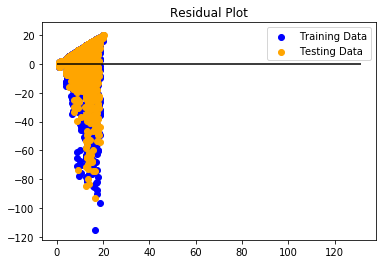

In [19]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [21]:
#not a great score - .051
model.score(X_test, y_test)

0.0692485027523535